In [49]:
# !pip install scikit-learn

In [50]:
# !pip install mljar-supervised

Import bibliotek

In [51]:
from supervised.automl import AutoML
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_recall_curve, roc_curve, auc
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.naive_bayes import GaussianNB
from supervised.automl import AutoML
import numpy as np
import pandas as pd
import sklearn

Wczytanie danych 

In [52]:
data = pd.read_excel('ae_retro_data.xlsx')

In [53]:
data.head()

,WEIGHT,REG_AGE,PRIM_CARE,CHEST_CLINIC,CURR_INH_STEROID,AGE_FIRST_SX,PREV_ORAL_STEROID,PREV_ED_LAST_YEAR,PREV_ADM,ENV_SMOKE,...,REASS_SAO2_ENV,REASS_AIR_ENTRY,REASS_DISTRESS,REASS_COLOUR,REASS_EXP_WHEEZE,REASS_INSP_WHEEZE,REASS_RETRACTIONS,NUM_MASKS,CORR_CATEGORY,DECISION_OFFSET
0,16.6,3.301370,FD,NO,?,2,GE_1M_LT_3M,2_VISITS,FLOOR,?,...,?,?,NONE,PINK,MILD,MILD,?,0,LONG,60
1,16.6,5.205479,FD,NO,PRN,3,GE_12M,NONE,NONE,?,...,SUPPL_O2,GOOD,?,?,NONE,NONE,NONE,1,SHORT,60
2,16.6,5.205479,FD,NO,PRN,3,GE_12M,NONE,NONE,?,...,ROOM_AIR,GOOD,?,PINK,NONE,NONE,NONE,1,SHORT,120
3,?,15.030137,FD,NO,?,2,GE_12M,2_VISITS,NONE,YES,...,?,GOOD,NONE,PINK,NONE,NONE,NONE,1,ADMIT,120
4,23.5,4.739726,FD,YES,PRN,2,GE_3M_LT_12M,GE_4_VISITS,FLOOR,?,...,?,FAIR,?,?,NONE,NONE,MILD,1,SHORT,60


Skopiowanie danych dla bezpieczeństwa

In [54]:
df = data.copy()

Wyświetlenie informacji o danych

In [55]:
df.info()
df.describe().T
df.describe(include=['object']).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WEIGHT              1070 non-null   object 
 1   REG_AGE             1070 non-null   float64
 2   PRIM_CARE           1070 non-null   object 
 3   CHEST_CLINIC        1070 non-null   object 
 4   CURR_INH_STEROID    1070 non-null   object 
 5   AGE_FIRST_SX        1070 non-null   object 
 6   PREV_ORAL_STEROID   1070 non-null   object 
 7   PREV_ED_LAST_YEAR   1070 non-null   object 
 8   PREV_ADM            1070 non-null   object 
 9   ENV_SMOKE           1070 non-null   object 
 10  ENV_DANDER          1070 non-null   object 
 11  ENV_CARPETS         1070 non-null   object 
 12  ALLG_ENV            1070 non-null   object 
 13  ALLG_PETS           1070 non-null   object 
 14  ALLG_FOOD           1070 non-null   object 
 15  PTHX_ATOPY          1070 non-null   object 
 16  FMHX_A

,count,unique,top,freq
WEIGHT,1070.0,289.0,14.7,19.0
PRIM_CARE,1070,5,FD,1014
CHEST_CLINIC,1070,2,NO,931
CURR_INH_STEROID,1070,6,?,439
AGE_FIRST_SX,1070,29,1,263
PREV_ORAL_STEROID,1070,6,GE_3M_LT_12M,337
PREV_ED_LAST_YEAR,1070,6,NONE,415
PREV_ADM,1070,4,NONE,726
ENV_SMOKE,1070,3,?,730
ENV_DANDER,1070,3,?,752


Zamiana NONE i ? na nan 

In [56]:
df.replace(['NONE', '?'], np.nan, inplace=True)

/var/folders/_d/rr84dvr97t12y4hdctmzmqg40000gn/T/ipykernel_72623/4133470219.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`


Sprawdzenie ilości wartosci null

In [57]:
df.isnull().sum() 
df.isnull().mean() * 100 


WEIGHT                 0.841121
REG_AGE                0.000000
PRIM_CARE              3.177570
CHEST_CLINIC           0.000000
CURR_INH_STEROID      65.607477
AGE_FIRST_SX          10.093458
PREV_ORAL_STEROID     32.616822
PREV_ED_LAST_YEAR     40.186916
PREV_ADM              69.345794
ENV_SMOKE             68.224299
ENV_DANDER            70.280374
ENV_CARPETS           83.084112
ALLG_ENV               2.056075
ALLG_PETS              1.214953
ALLG_FOOD              1.869159
PTHX_ATOPY            29.439252
FMHX_ASTHMA           23.084112
ALLG_EXP              72.523364
URTI_SX                3.551402
FEVER                  9.626168
DUR_ASTHMA_SX          5.140187
VENT_LAST_24H         20.467290
ARRV_ED                1.214953
TRIAGE_TEMP           24.859813
TRIAGE_TEMP_TYPE      24.859813
TRIAGE_RESP_RATE       7.196262
TRIAGE_HEART_RATE      1.775701
TRIAGE_SAO2            1.775701
TRIAGE_SAO2_ENV        1.775701
TRIAGE_AIR_ENTRY       6.915888
TRIAGE_DISTRESS       65.607477
TRIAGE_C

Wyświetlenie informacji o danych

In [58]:
df.info()
df.describe().T
df.describe(include=['object']).T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 50 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   WEIGHT              1061 non-null   float64
 1   REG_AGE             1070 non-null   float64
 2   PRIM_CARE           1036 non-null   object 
 3   CHEST_CLINIC        1070 non-null   object 
 4   CURR_INH_STEROID    368 non-null    object 
 5   AGE_FIRST_SX        962 non-null    float64
 6   PREV_ORAL_STEROID   721 non-null    object 
 7   PREV_ED_LAST_YEAR   640 non-null    object 
 8   PREV_ADM            328 non-null    object 
 9   ENV_SMOKE           340 non-null    object 
 10  ENV_DANDER          318 non-null    object 
 11  ENV_CARPETS         181 non-null    object 
 12  ALLG_ENV            1048 non-null   object 
 13  ALLG_PETS           1057 non-null   object 
 14  ALLG_FOOD           1050 non-null   object 
 15  PTHX_ATOPY          755 non-null    object 
 16  FMHX_A

,count,unique,top,freq
PRIM_CARE,1036,3,FD,1014
CHEST_CLINIC,1070,2,NO,931
CURR_INH_STEROID,368,4,PRN,276
PREV_ORAL_STEROID,721,4,GE_3M_LT_12M,337
PREV_ED_LAST_YEAR,640,4,1_VISIT,303
PREV_ADM,328,2,FLOOR,295
ENV_SMOKE,340,2,NO,174
ENV_DANDER,318,2,NO,184
ENV_CARPETS,181,2,NO,91
ALLG_ENV,1048,2,NO,682


Stworzenie klasyfikacji binarnej klasy decyzyjnej 

In [59]:
df['CORR_CATEGORY'] = df['CORR_CATEGORY'].map({'SHORT': 0, 'ADMIT': 1, 'LONG': 1})

Zamiana zmiennych kategorycznych 

In [60]:
cat_cols = df.select_dtypes(include=['object', 'category']).columns
prefixes = [f'new_{col}' for col in cat_cols]
df = pd.get_dummies(data=df, drop_first = True, columns=cat_cols, prefix=prefixes, prefix_sep='_')

Standaryzacja zmiennych

In [61]:
scaler = StandardScaler()
df[['DECISION_OFFSET','REG_AGE','NUM_MASKS']] = scaler.fit_transform(df[['DECISION_OFFSET','REG_AGE','NUM_MASKS']])
df

,WEIGHT,REG_AGE,AGE_FIRST_SX,DUR_ASTHMA_SX,VENT_LAST_24H,TRIAGE_TEMP,TRIAGE_RESP_RATE,TRIAGE_HEART_RATE,TRIAGE_SAO2,REASS_TEMP,...,new_REASS_AIR_ENTRY_POOR,new_REASS_DISTRESS_MOD,new_REASS_COLOUR_PALE,new_REASS_COLOUR_PINK,new_REASS_EXP_WHEEZE_MOD,new_REASS_EXP_WHEEZE_SEVERE,new_REASS_INSP_WHEEZE_MOD,new_REASS_INSP_WHEEZE_SEVERE,new_REASS_RETRACTIONS_MOD,new_REASS_RETRACTIONS_SEVERE
0,16.6,-0.695168,2.0,72.0,NaN,36.6,28.0,128.0,97.0,36.6,...,False,False,False,True,False,False,False,False,False,False
1,16.6,-0.169302,3.0,24.0,NaN,37.4,26.0,120.0,91.0,NaN,...,False,False,False,False,False,False,False,False,False,False
2,16.6,-0.169302,3.0,24.0,NaN,37.4,26.0,120.0,91.0,NaN,...,False,False,False,True,False,False,False,False,False,False
3,NaN,2.544012,2.0,24.0,0.0,NaN,24.0,129.0,93.0,NaN,...,False,False,False,True,False,False,False,False,False,False
4,23.5,-0.297931,2.0,24.0,6.0,37.7,44.0,119.0,95.0,NaN,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,14.0,-1.128723,1.0,16.0,4.0,36.4,42.0,140.0,89.0,NaN,...,False,False,True,False,True,False,False,False,False,False
1066,14.0,-1.128723,1.0,16.0,4.0,36.4,42.0,140.0,89.0,NaN,...,False,False,True,False,True,False,True,False,True,False
1067,10.7,-1.090134,1.0,12.0,NaN,38.4,36.0,158.0,94.0,NaN,...,False,False,False,False,False,False,False,False,False,False
1068,10.7,-1.090134,1.0,12.0,NaN,38.4,36.0,158.0,94.0,NaN,...,False,False,True,False,False,False,False,False,False,False


Uzupełnienie braków danych średnią wartością z kolumny

In [62]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean')
df_after_imputer = imputer.fit_transform(df)
df_after_imputer = pd.DataFrame(df_after_imputer, columns=df.columns, index=df.index)

In [63]:
df_after_imputer

,WEIGHT,REG_AGE,AGE_FIRST_SX,DUR_ASTHMA_SX,VENT_LAST_24H,TRIAGE_TEMP,TRIAGE_RESP_RATE,TRIAGE_HEART_RATE,TRIAGE_SAO2,REASS_TEMP,...,new_REASS_AIR_ENTRY_POOR,new_REASS_DISTRESS_MOD,new_REASS_COLOUR_PALE,new_REASS_COLOUR_PINK,new_REASS_EXP_WHEEZE_MOD,new_REASS_EXP_WHEEZE_SEVERE,new_REASS_INSP_WHEEZE_MOD,new_REASS_INSP_WHEEZE_SEVERE,new_REASS_RETRACTIONS_MOD,new_REASS_RETRACTIONS_SEVERE
0,16.600000,-0.695168,2.0,72.0,3.544066,36.600000,28.0,128.0,97.0,36.600000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,16.600000,-0.169302,3.0,24.0,3.544066,37.400000,26.0,120.0,91.0,37.166207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,16.600000,-0.169302,3.0,24.0,3.544066,37.400000,26.0,120.0,91.0,37.166207,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,24.618596,2.544012,2.0,24.0,0.000000,38.887687,24.0,129.0,93.0,37.166207,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,23.500000,-0.297931,2.0,24.0,6.000000,37.700000,44.0,119.0,95.0,37.166207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1065,14.000000,-1.128723,1.0,16.0,4.000000,36.400000,42.0,140.0,89.0,37.166207,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1066,14.000000,-1.128723,1.0,16.0,4.000000,36.400000,42.0,140.0,89.0,37.166207,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1067,10.700000,-1.090134,1.0,12.0,3.544066,38.400000,36.0,158.0,94.0,37.166207,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1068,10.700000,-1.090134,1.0,12.0,3.544066,38.400000,36.0,158.0,94.0,37.166207,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Zliczenie wartości zmiennej docelowej 

In [64]:
df_after_imputer.CORR_CATEGORY.value_counts()

CORR_CATEGORY
1.0    653
0.0    417
Name: count, dtype: int64

Rozkład zmiennej CORR_CATEGORY w zbiorze danych df_after_imputer

<Axes: ylabel='count'>

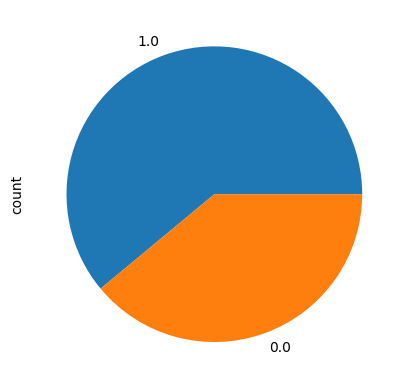

In [65]:
df_after_imputer.CORR_CATEGORY.value_counts().plot(kind='pie')

Podział na dane i target

In [66]:
data = df_after_imputer.copy()
target = data.pop('CORR_CATEGORY')

Podział danych na dwa zbiory - treningowy i testowy

In [67]:
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state = 42)

In [68]:
y_train.value_counts()

CORR_CATEGORY
1.0    490
0.0    312
Name: count, dtype: int64

In [69]:
y_test.value_counts()

CORR_CATEGORY
1.0    163
0.0    105
Name: count, dtype: int64

Klasyfikator bazowy - Regresja logistyczna 

In [70]:
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [71]:
print(f"Accuracy: {accuracy_score(y_test, y_pred)*100.0:2f}%%" )

Accuracy: 63.805970%%


Klasyfikator docelowy przy użyciu AutoML

In [72]:
automl = AutoML(eval_metric = 'accuracy')
automl.fit(X_train, y_train)

AutoML directory: AutoML_1
The task is binary_classification with evaluation metric accuracy
AutoML will use algorithms: ['Baseline', 'Linear', 'Decision Tree', 'Random Forest', 'Xgboost', 'Neural Network']
AutoML will ensemble available models
AutoML steps: ['simple_algorithms', 'default_algorithms', 'ensemble']
* Step simple_algorithms will try to check up to 3 models
1_Baseline accuracy 0.61194 trained in 0.12 seconds
2_DecisionTree accuracy 0.736318 trained in 6.34 seconds
3_Linear accuracy 0.766169 trained in 1.99 seconds
* Step default_algorithms will try to check up to 3 models
4_Default_Xgboost accuracy 0.781095 trained in 2.25 seconds
5_Default_NeuralNetwork accuracy 0.751244 trained in 0.99 seconds
6_Default_RandomForest accuracy 0.761194 trained in 1.73 seconds
* Step ensemble will try to check up to 1 model
Ensemble accuracy 0.78607 trained in 0.62 seconds
AutoML fit time: 17.51 seconds
AutoML best model: Ensemble


AutoML(eval_metric='accuracy')

In [73]:
predictions = automl.predict(X_test)

In [74]:
conf_matrix = confusion_matrix(y_test, predictions)

In [75]:
conf_matrix

array([[ 79,  26],
       [ 36, 127]])

In [76]:
print(f"Accuracy: {accuracy_score(y_test, predictions)*100.0:2f}%%" )

Accuracy: 76.865672%%


Stworzenie wybranego klasyfikatora przez AutoML

In [77]:
RANDOM_STATE = 42
xgb = XGBClassifier(random_state=RANDOM_STATE, eval_metric='logloss')

Konwersja typów danych na tablice numpy

In [78]:
data = data.values
target = target.values

Deklaracja wyników

In [79]:
results = {
    'NaiveBayes': {
        'auroc': [], 'auprc': [],
        'med_fnr': [], 'med_fpr': [], 'med_pct': [],
        'high_fnr': [], 'high_fpr': [], 'high_pct': [],
    },
    'xgboost': {
        'auroc': [], 'auprc': [],
        'med_fnr': [], 'med_fpr': [], 'med_pct': [],
        'high_fnr': [], 'high_fpr': [], 'high_pct': [],
    }
}

In [80]:
def calculate_risk_metrics(y_test, decisions, grey_zone_mask):
    mask = ~grey_zone_mask
    y_test_classified = y_test[mask]
    decisions_classified = decisions[mask]
    
    tp = np.sum((decisions_classified == 1) & (y_test_classified == 1))
    fn = np.sum((decisions_classified == 0) & (y_test_classified == 1))
    fp = np.sum((decisions_classified == 1) & (y_test_classified == 0))
    tn = np.sum((decisions_classified == 0) & (y_test_classified == 0))
    
    fpr = fp / (tn + fp) if (tn + fp) > 0 else 0
    fnr = fn / (tp + fn) if (tp + fn) > 0 else 0
    
    return fpr, fnr

In [81]:
cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=5, random_state=RANDOM_STATE)

fold_count = 0
for train_idx, test_idx in cv.split(data, target):
    fold_count += 1
    
    X_train, X_test = data[train_idx], data[test_idx]
    y_train, y_test = target[train_idx], target[test_idx]
    
    # Trenowanie klasyfikatorów
    gnb.fit(X_train, y_train)
    xgb.fit(X_train, y_train)
    

    for clf_name, clf in [('NaiveBayes', gnb), ('xgboost', xgb)]:
        y_proba = clf.predict_proba(X_test)[:, 1]
        
        precision, recall, pr_thresholds = precision_recall_curve(y_test, y_proba)
        fpr, tpr, roc_thresholds = roc_curve(y_test, y_proba)
        
        auroc = auc(fpr, tpr)
        auprc = auc(recall, precision)
        
        results[clf_name]['auroc'].append(auroc)
        results[clf_name]['auprc'].append(auprc)
        
        train_proba = clf.predict_proba(X_train)[:, 1]
        train_fpr, train_tpr, train_roc_thresholds = roc_curve(y_train, train_proba)
        
        sensitivity_99_idx = np.where(train_tpr >= 0.99)[0]
        if len(sensitivity_99_idx) > 0:
            medium_risk_threshold = train_roc_thresholds[sensitivity_99_idx[0]]
        else:
            medium_risk_threshold = train_roc_thresholds[0]
        
        specificity_90_idx = np.where(1 - train_fpr >= 0.90)[0]
        if len(specificity_90_idx) > 0:
            high_risk_threshold = train_roc_thresholds[specificity_90_idx[-1]]
        else:
            high_risk_threshold = train_roc_thresholds[-1]
        
        decisions = np.full(len(y_proba), -1)
        decisions[y_proba >= high_risk_threshold] = 1
        decisions[y_proba < medium_risk_threshold] = 0
        
        grey_zone_mask = (decisions == -1)
        
        fpr_corrected, fnr_corrected = calculate_risk_metrics(y_test, decisions, grey_zone_mask)
        
        neg_pct = np.sum(decisions == 0) / len(decisions)
        pos_pct = np.sum(decisions == 1) / len(decisions)
        grey_pct = np.sum(grey_zone_mask) / len(decisions)
        
        results[clf_name]['med_fnr'].append(fnr_corrected)
        results[clf_name]['med_fpr'].append(fpr_corrected)
        results[clf_name]['med_pct'].append(neg_pct)
        results[clf_name]['high_fnr'].append(fnr_corrected)
        results[clf_name]['high_fpr'].append(fpr_corrected)
        results[clf_name]['high_pct'].append(pos_pct)

In [82]:
print("\n===== RESULTS =====")
for clf_name in ['NaiveBayes','xgboost']:
    print(f"\n{clf_name.upper()} CLASSIFIER:")
    print(f"AUPRC: {np.mean(results[clf_name]['auprc']):.4f} (±{np.std(results[clf_name]['auprc']):.4f})")
    print(f"AUROC: {np.mean(results[clf_name]['auroc']):.4f} (±{np.std(results[clf_name]['auroc']):.4f})")
    
    print("\nMedium-risk threshold (neg < threshold):")
    print(f"FNR: {np.mean(results[clf_name]['med_fnr']):.4f} (±{np.std(results[clf_name]['med_fnr']):.4f})")
    print(f"FPR: {np.mean(results[clf_name]['med_fpr']):.4f} (±{np.std(results[clf_name]['med_fpr']):.4f})")
    print(f"% classified as negative: {np.mean(results[clf_name]['med_pct'])*100:.2f}%")
    
    print("\nHigh-risk threshold (pos >= threshold):")
    print(f"FNR: {np.mean(results[clf_name]['high_fnr']):.4f} (±{np.std(results[clf_name]['high_fnr']):.4f})")
    print(f"FPR: {np.mean(results[clf_name]['high_fpr']):.4f} (±{np.std(results[clf_name]['high_fpr']):.4f})")
    print(f"% classified as positive: {np.mean(results[clf_name]['high_pct'])*100:.2f}%")
    
    # Calculate gray zone percentage
    gray_zone_pct = 100 - (np.mean(results[clf_name]['med_pct'])*100 + np.mean(results[clf_name]['high_pct'])*100)
    print(f"Gray zone (moderate risk): {gray_zone_pct:.2f}%")


===== RESULTS =====

NAIVEBAYES CLASSIFIER:
AUPRC: 0.8398 (±0.0212)
AUROC: 0.7740 (±0.0225)

Medium-risk threshold (neg < threshold):
FNR: 0.0452 (±0.0345)
FPR: 0.6905 (±0.1658)
% classified as negative: 4.06%

High-risk threshold (pos >= threshold):
FNR: 0.0452 (±0.0345)
FPR: 0.6905 (±0.1658)
% classified as positive: 37.42%
Gray zone (moderate risk): 58.52%

XGBOOST CLASSIFIER:
AUPRC: 0.9246 (±0.0111)
AUROC: 0.8820 (±0.0179)

Medium-risk threshold (neg < threshold):
FNR: 0.3283 (±0.0338)
FPR: 0.0988 (±0.0283)
% classified as negative: 55.16%

High-risk threshold (pos >= threshold):
FNR: 0.3283 (±0.0338)
FPR: 0.0988 (±0.0283)
% classified as positive: 44.84%
Gray zone (moderate risk): 0.00%


## Wnioski

### Ogólna skuteczność modeli

Pod względem ogólnej skuteczności model XGBoost wyraźnie przewyższa Naive Bayes:

- **AUPRC (Area Under Precision-Recall Curve):**
  - **XGBoost:** 0.9246 (±0.0111)
  - **Naive Bayes:** 0.8398 (±0.0212)
  - Wyższy AUPRC wskazuje, że XGBoost skuteczniej rozpoznaje istotne (pozytywne) przypadki, co jest ważne przy niezbalansowanych danych.

- **AUROC (Area Under ROC Curve):**
  - **XGBoost:** 0.8820 (±0.0179)
  - **Naive Bayes:** 0.7740 (±0.0225)
  - Wyższa wartość AUROC świadczy o lepszej zdolności XGBoost do rozróżniania klas pozytywnych i negatywnych przy różnych progach decyzyjnych.

W obu modelach zastosowano podejście oparte na dwóch progach (niskiego i wysokiego ryzyka), pozwalające na podział przypadków na trzy kategorie:  
- niskie ryzyko  
- wysokie ryzyko  
- gray zone (obszar niepewności)

---

### Naive Bayes

#### Medium-risk threshold (neg < threshold):

- **False Negative Rate (FNR):** 0.0452 (±0.0345)
- **False Positive Rate (FPR):** 0.6905 (±0.1658)
- **Odsetek przypadków sklasyfikowanych jako niskiego ryzyka:** 4.06%

Bardzo niska FNR oznacza, że model rzadko pomija przypadki pozytywne w tej grupie. Jednak bardzo wysoka FPR pokazuje, że model często mylnie klasyfikuje negatywne przypadki jako pozytywne, nawet w grupie uznanej za niskiego ryzyka. Mała część przypadków trafia do tej kategorii.

#### High-risk threshold (pos ≥ threshold):

- **FNR:** 0.0452 (±0.0345)
- **FPR:** 0.6905 (±0.1658)
- **Odsetek przypadków sklasyfikowanych jako wysokiego ryzyka:** 37.42%
- **Gray zone (obszar niepewności):** 58.52%

Model wykazuje tę samą, umiarkowaną czułość i bardzo wysoką FPR także dla przypadków wysokiego ryzyka. Aż 58.52% danych trafia do strefy niepewności ("gray zone"), co ogranicza praktyczną przydatność modelu.

---

### XGBoost

#### Medium-risk threshold (neg < threshold):

- **FNR:** 0.3283 (±0.0338)
- **FPR:** 0.0988 (±0.0283)
- **Odsetek przypadków sklasyfikowanych jako niskiego ryzyka:** 55.16%

Model uznaje dużą część przypadków za niskiego ryzyka, jednak do tej grupy trafia ok. 33% przypadków pozytywnych (wysoka FNR). Jednocześnie bardzo rzadko popełnia fałszywe alarmy (niska FPR).

#### High-risk threshold (pos ≥ threshold):

- **FNR:** 0.3283 (±0.0338)
- **FPR:** 0.0988 (±0.0283)
- **Odsetek przypadków sklasyfikowanych jako wysokiego ryzyka:** 44.84%
- **Gray zone:** 0.00%

Model klasyfikuje wszystkie przypadki jednoznacznie jako niskiego lub wysokiego ryzyka, eliminując całkowicie obszar niepewności ("gray zone"). Część pozytywnych przypadków zostaje przeoczona (wysoka FNR), ale FPR pozostaje na niskim poziomie.

---

### Podsumowanie

- **XGBoost** charakteryzuje się wyższą skutecznością ogólną (AUPRC, AUROC) i skutecznie ogranicza fałszywe alarmy w obu grupach ryzyka, jednocześnie nie pozostawiając przypadków w "szarej strefie".
- **Naive Bayes** osiąga niższe wartości miar skuteczności i znaczną część przypadków pozostawia w obszarze niepewności, a w klasyfikacji przypadków niskiego i wysokiego ryzyka charakteryzuje się bardzo wysokim poziomem fałszywych alarmów.
